Import Required Libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load Dataset

In [37]:
df = pd.read_csv('bank.csv', sep=';')  # Use the semicolon delimiter
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**Basic Data Exploration**

Summary and missing values

In [38]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Countplots for categorical features

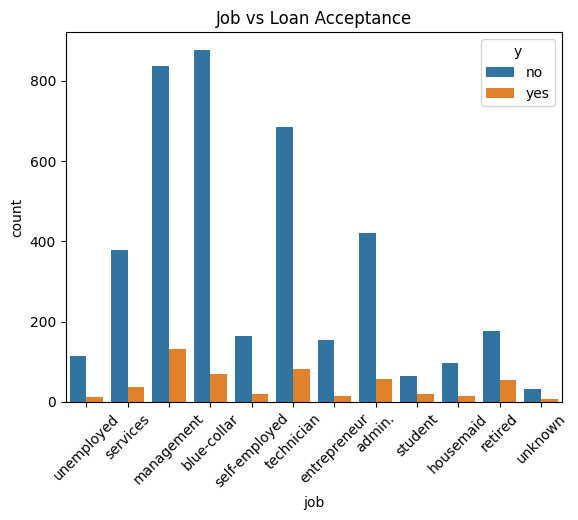

In [39]:
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=45)
plt.title('Job vs Loan Acceptance')
plt.show()

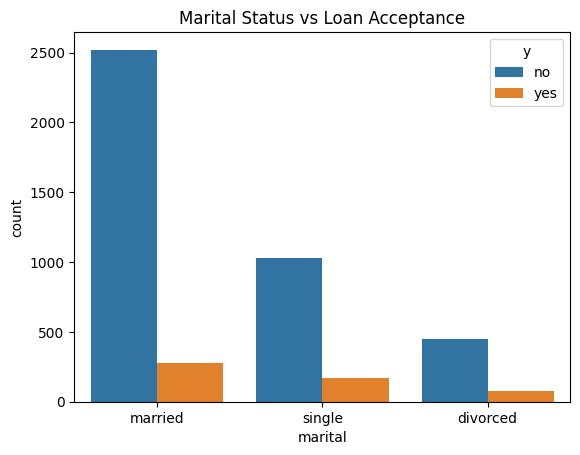

In [40]:
sns.countplot(data=df, x='marital', hue='y')
plt.title('Marital Status vs Loan Acceptance')
plt.show()

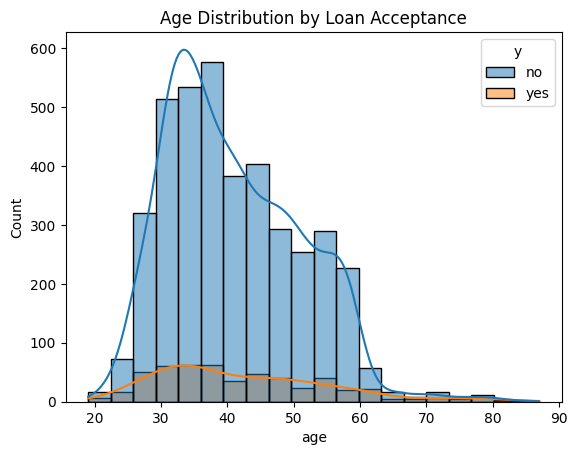

In [41]:
sns.histplot(data=df, x='age', hue='y', bins=20, kde=True)
plt.title('Age Distribution by Loan Acceptance')
plt.show()

**Data Preprocessing**

Encode Categorical Variables

In [42]:
df_encoded = pd.get_dummies(df, drop_first=True)  # One-hot encode all categorical columns

Split Features and Target

In [43]:
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']  # 1 = accepted, 0 = not accepted

Train-Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling (optional for Logistic Regression)

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Training**

Logistic Regression

In [46]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

Decision Tree

In [47]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

Model Evaluation

Logistic Regression Accuracy: 0.901657458563536
Decision Tree Accuracy: 0.9060773480662984

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.98      0.95       807
        True       0.60      0.28      0.38        98

    accuracy                           0.90       905
   macro avg       0.76      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905



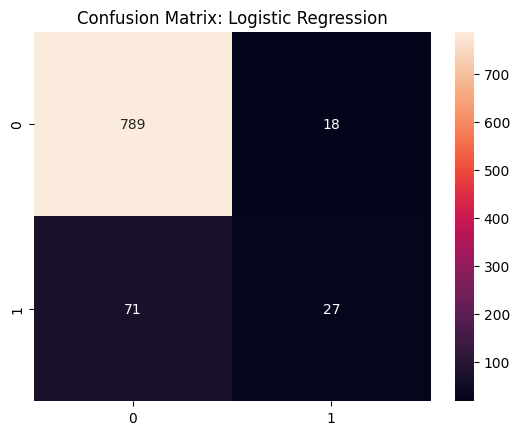

In [48]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_preds))

print("\nClassification Report:\n", classification_report(y_test, log_preds))

sns.heatmap(confusion_matrix(y_test, log_preds), annot=True, fmt='d')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

Customer Group Analysis

In [49]:
# Group by job and compute loan acceptance rate
acceptance_by_job = df.groupby('job')['y'].value_counts(normalize=True).unstack().fillna(0)
acceptance_by_job['acceptance_rate'] = acceptance_by_job['yes']
acceptance_by_job.sort_values('acceptance_rate', ascending=False)

y,no,yes,acceptance_rate
job,,,
retired,0.765217,0.234783,0.234783
student,0.773810,0.226190,0.226190
unknown,0.815789,0.184211,0.184211
management,0.864809,0.135191,0.135191
housemaid,0.875000,0.125000,0.125000
admin.,0.878661,0.121339,0.121339
self-employed,0.890710,0.109290,0.109290
technician,0.891927,0.108073,0.108073
unemployed,0.898438,0.101562,0.101562
